<a href="https://colab.research.google.com/github/Rohsha/NLP/blob/master/Natural_language_processing_Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import random
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
k=nltk.download('twitter_samples')
print(k)
twitter_samples


[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.
True


<TwitterCorpusReader in '/root/nltk_data/corpora/twitter_samples'>

In [3]:
all_positive_tweets=twitter_samples.strings('positive_tweets.json')
all_negative_tweets=twitter_samples.strings('negative_tweets.json')

In [4]:
print('No of pos tweets',len(all_positive_tweets))
print('No of neg tweets',len(all_negative_tweets))

No of pos tweets 5000
No of neg tweets 5000


In [5]:
print('the type of positive tweets',type(all_positive_tweets))
print('type of a tweet entry is',type(all_negative_tweets[0]))

the type of positive tweets <class 'list'>
type of a tweet entry is <class 'str'>


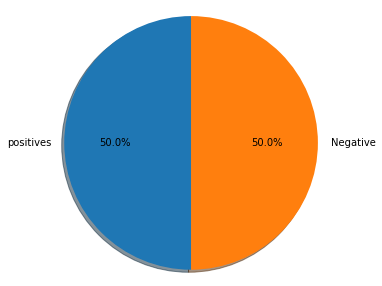

In [7]:
fig=plt.figure(figsize=(5,5))
labels='positives','Negative'
sizes=[len(all_positive_tweets),len(all_negative_tweets)]
plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=True,startangle=90)
plt.axis('equal')
plt.show()

In [8]:
print('\033[92m'+all_positive_tweets[random.randint(0,5000)])

Check out my #blog!! http://t.co/yJxIrWiMZ1. Let me know what you want to see :) #lbloggers #pbloggers #recipes #bookreview #toddlerlife


In [9]:
#preprocess raw text for sentiment analysis
#tokenization,sto word removel,lowercasing,punctuation and stemming

In [10]:
tweet=all_positive_tweets[1281]
tweet="RT test @hubspot goosnight again everyone i love u all :)"
print(tweet)

RT test @hubspot goosnight again everyone i love u all :)


In [11]:
#Remove hyperlinks,twitter marks and styles
tweet2 = re.sub(r'^RT[\s]+', '', tweet)

tweet2 = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet2)

tweet2 = re.sub(r'#', '', tweet2)

print(tweet2)

test @hubspot goosnight again everyone i love u all :)


In [17]:
print()
print('\033[92m' + tweet2)
print('\033[94m')

# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

# tokenize tweets
tweet_tokens = tokenizer.tokenize(tweet2)

print()
print('Tokenized string:')
print(tweet_tokens)


test @hubspot goosnight again everyone i love u all :)


Tokenized string:
['test', 'goosnight', 'again', 'everyone', 'i', 'love', 'u', 'all', ':)']


In [20]:
#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english') 

print('Stop words\n')
print(len(stopwords_english))

print('\nPunctuation\n')
print(string.punctuation)

Stop words

179

Punctuation

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [19]:
print()
print('\033[92m')
print(tweet_tokens)
print('\033[94m')

tweets_clean = []

for word in tweet_tokens: # Go through every word in your tokens list
    if (word not in stopwords_english and  # remove stopwords
        word not in string.punctuation):  # remove punctuation
        tweets_clean.append(word)

print('removed stop words and punctuation:')
print(tweets_clean)



['test', 'goosnight', 'again', 'everyone', 'i', 'love', 'u', 'all', ':)']

removed stop words and punctuation:
['test', 'goosnight', 'everyone', 'love', 'u', ':)']


In [21]:
stemmer = PorterStemmer() 

# Create an empty list to store the stems
tweets_stem = [] 

for word in tweets_clean:
    stem_word = stemmer.stem(word)  # stemming word
    tweets_stem.append(stem_word)  # append to the list

print('stemmed words:')
print(tweets_stem)

stemmed words:
['test', 'goosnight', 'everyon', 'love', 'u', ':)']
